### marker list

In [37]:
cell_markers = {
    'Astrocyte': ['Slc1a2', 'Aqp4', 'Gja1'],
    'Fibroblast': ['Dcn'],
    'Inhibitory Neurons': ['Gad1', 'Gad2', 'Slc6a5'],
    'Expn': ['Slc17a6', 'Slc17a7'],
    'Endothelial': ['Flt1', 'Cldn5'],
    'Oligodendrocyte': ['Mobp', 'Mog', 'Mag'],
    'Oligodendrocyte Precursor Cell': ['Vcan'],
    'Pericyte': ['Pdgfrb', 'Vtn'],
    'Macrophage': ['Mrc1', 'Ptorc', 'Csf1r', 'C1qa'],
    'UBC': ['Slc17a7', 'Samd3'],
    'Granule': ['Gabra6'],
    'Microglia': ['Ptorc', 'Csf1r', 'C1qa'],
    'VSMC': ['Mgp'],
    'Ependymal': ['Foxj1']
}


### analysis process

In [2]:
import scanpy as sc
import scvi
import pandas as pd

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [3]:
introexon1=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/CNs/analysis/doublet.h5ad")
introexon1

AnnData object with n_obs × n_vars = 3567 × 31392
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'umi'

In [4]:
sc.pp.highly_variable_genes(introexon1, n_top_genes=1500, flavor='seurat_v3',layer='umi')


In [5]:
scvi.model.SCVI.setup_anndata(introexon1)
vae=scvi.model.SCVI(introexon1)
vae.train()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/juany/.conda/envs/scanpy/lib/python3.11/site-p ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/juany/.conda/envs/scanpy/lib/python3.11/site-p ...

Epoch 400/400: 100%|██████████| 400/400 [15:54<00:00,  2.35s/it, v_num=1, train_loss_step=9.52e+3, train_loss_epoch=9.56e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [15:54<00:00,  2.39s/it, v_num=1, train_loss_step=9.52e+3, train_loss_epoch=9.56e+3]


In [6]:
solo=scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/juany/.conda/envs/scanpy/lib/python3.11/site-p ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/juany/.conda/envs/scanpy/lib/python3.11/site-p ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 358/400:  90%|████████▉ | 358/400 [01:38<00:11,  3.64it/s, v_num=1, train_loss_step=0.109, train_loss_epoch=0.254] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.278. Signaling Trainer to stop.


In [7]:
solo.predict()

,doublet,singlet
AACCACATCGAAGACCGTAA,1.002930,-0.271554
AACCACATCGAAGCTGACCG,-0.326444,0.254222
AACCACATCGACCATATGAG,0.606830,-0.178197
AACCACATCGACCTACCTGG,-3.416076,3.259008
AACCACATCGAGATCATCTG,-2.984133,2.982702
...,...,...
TTGATCTTGGTGCCTGAGAT,0.043438,0.844966
TTGATCTTGGTGGTTCGCAA,-1.586970,1.699094
TTGATCTTGGTTGCCTCGAT,0.177008,0.539026
TTGATCTTGGTTGCGCTAAT,-0.183086,0.454794


In [32]:
df=solo.predict()
df['prediction']=solo.predict(soft=False)
df

,doublet,singlet,prediction
AACCACATCGAAGACCGTAA,1.002930,-0.271554,doublet
AACCACATCGAAGCTGACCG,-0.326444,0.254222,singlet
AACCACATCGACCATATGAG,0.606830,-0.178197,doublet
AACCACATCGACCTACCTGG,-3.416076,3.259008,singlet
AACCACATCGAGATCATCTG,-2.984133,2.982702,singlet
...,...,...,...
TTGATCTTGGTGCCTGAGAT,0.043438,0.844966,singlet
TTGATCTTGGTGGTTCGCAA,-1.586970,1.699094,singlet
TTGATCTTGGTTGCCTCGAT,0.177008,0.539026,singlet
TTGATCTTGGTTGCGCTAAT,-0.183086,0.454794,singlet


In [17]:
df[df.prediction == 'doublet']

,doublet,singlet,prediction
AACCACATCGAAGACCGT,1.002930,-0.271554,doublet
AACCACATCGACCATATG,0.606830,-0.178197,doublet
AACCACATCGCTCGATGA,0.327765,-0.303952,doublet
AACCACATCGTAGCTTCC,0.119147,-0.436508,doublet
AACCACATCGTCAGAGCT,1.029757,-1.002283,doublet
...,...,...,...
TTGATCTTGGTCTAATCG,1.251738,-0.064214,doublet
TTGATCTTGGTCTCGCTG,0.047176,-0.133040,doublet
TTGATCTTGGTCTGTTCT,-0.046019,-0.376250,doublet
TTGATCTTGGTGATAGCG,0.140977,-0.520372,doublet


In [34]:
df.index

Index(['AACCACATCGAAGACCGTAA', 'AACCACATCGAAGCTGACCG', 'AACCACATCGACCATATGAG',
       'AACCACATCGACCTACCTGG', 'AACCACATCGAGATCATCTG', 'AACCACATCGAGGAGATACA',
       'AACCACATCGATAGTCGAAG', 'AACCACATCGATCACCAACA', 'AACCACATCGATCCTATACG',
       'AACCACATCGATTCTGCCAA',
       ...
       'TTGATCTTGGTCTGAGTCGA', 'TTGATCTTGGTCTGTTCTCA', 'TTGATCTTGGTGAACGTGAG',
       'TTGATCTTGGTGATAGCGCG', 'TTGATCTTGGTGCACTAAGA', 'TTGATCTTGGTGCCTGAGAT',
       'TTGATCTTGGTGGTTCGCAA', 'TTGATCTTGGTTGCCTCGAT', 'TTGATCTTGGTTGCGCTAAT',
       'TTGATCTTGGTTGGCTGTTG'],
      dtype='object', length=3567)

In [33]:
introexon1.obs_names

Index(['AACCACATCGAAGACCGTAA', 'AACCACATCGAAGCTGACCG', 'AACCACATCGACCATATGAG',
       'AACCACATCGACCTACCTGG', 'AACCACATCGAGATCATCTG', 'AACCACATCGAGGAGATACA',
       'AACCACATCGATAGTCGAAG', 'AACCACATCGATCACCAACA', 'AACCACATCGATCCTATACG',
       'AACCACATCGATTCTGCCAA',
       ...
       'TTGATCTTGGTCTGAGTCGA', 'TTGATCTTGGTCTGTTCTCA', 'TTGATCTTGGTGAACGTGAG',
       'TTGATCTTGGTGATAGCGCG', 'TTGATCTTGGTGCACTAAGA', 'TTGATCTTGGTGCCTGAGAT',
       'TTGATCTTGGTGGTTCGCAA', 'TTGATCTTGGTTGCCTCGAT', 'TTGATCTTGGTTGCGCTAAT',
       'TTGATCTTGGTTGGCTGTTG'],
      dtype='object', length=3567)

In [31]:
introexon1['AACCACATCGAAGACCGT']

KeyError: 'AACCACATCGAAGACCGT'

In [35]:
introexon1.obs['prediction']=df.prediction
introexon1.obs


,sample_ID_Plate,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,prediction
AACCACATCGAAGACCGTAA,11074333,4314,4314,13718.0,9.0,0.065607,0,0,doublet
AACCACATCGAAGCTGACCG,11074333,3013,3012,5818.0,13.0,0.223444,0,0,singlet
AACCACATCGACCATATGAG,11177067,3578,3578,8366.0,15.0,0.179297,0,0,doublet
AACCACATCGACCTACCTGG,11074333,999,999,1252.0,2.0,0.159744,0,0,singlet
AACCACATCGAGATCATCTG,11074333,1060,1060,1470.0,3.0,0.204082,0,0,singlet
...,...,...,...,...,...,...,...,...,...
TTGATCTTGGTGCCTGAGAT,11074339,5071,5070,14163.0,13.0,0.091788,0,0,singlet
TTGATCTTGGTGGTTCGCAA,11074339,2372,2372,4185.0,3.0,0.071685,0,0,singlet
TTGATCTTGGTTGCCTCGAT,11074328,3761,3759,10147.0,12.0,0.118262,0,0,singlet
TTGATCTTGGTTGCGCTAAT,11074328,3223,3219,7855.0,6.0,0.076384,0,0,singlet


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


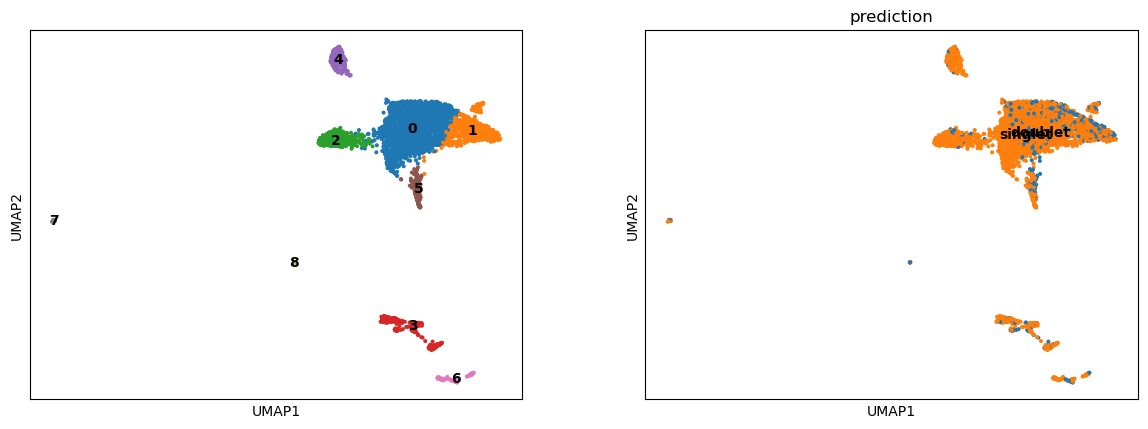

In [37]:
sc.pp.normalize_total(introexon1, target_sum=None)
sc.pp.log1p(introexon1)
sc.pp.scale(introexon1, max_value=10)
sc.tl.pca(introexon1, svd_solver='arpack')
sc.pp.neighbors(introexon1, n_neighbors=50, n_pcs=15)
sc.tl.leiden(introexon1, resolution=0.3)
sc.tl.umap(introexon1,min_dist=0.2)
# show the louvain clusters in the UMAP
sc.pl.umap(introexon1, color=['leiden','prediction'], , title='')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


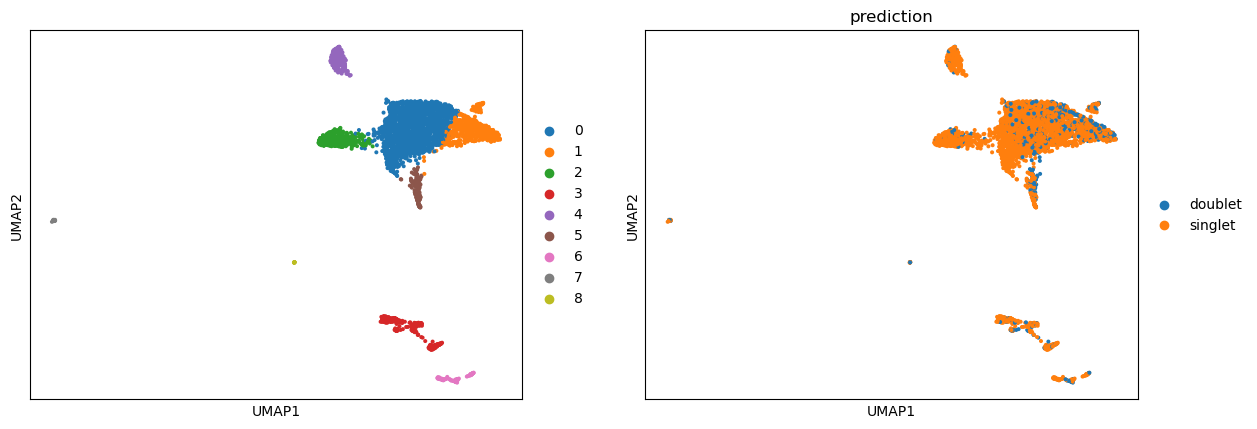

In [39]:
sc.pl.umap(introexon1, color=['leiden','prediction'], title='')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


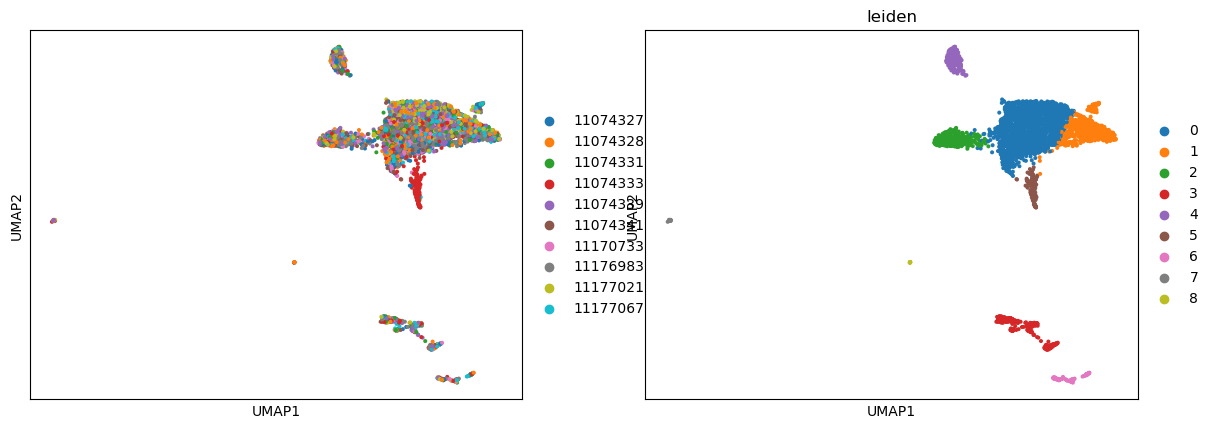

In [44]:
sc.pl.umap(introexon1, color=['sample_ID_Plate','leiden'] ,title='')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


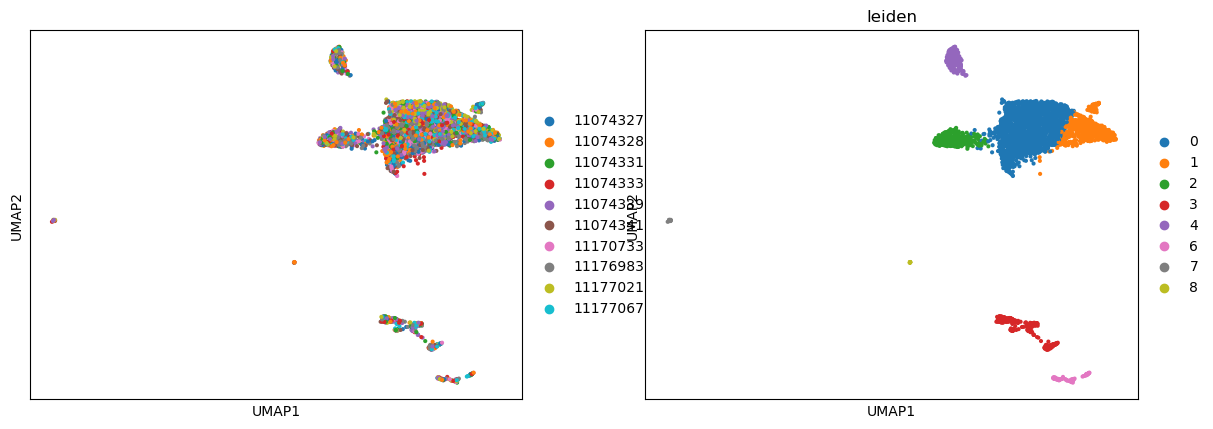

In [45]:
introexon_no5=introexon1[introexon1.obs.leiden!='5'].copy()
sc.pl.umap(introexon_no5, color=['sample_ID_Plate','leiden'] ,title='')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


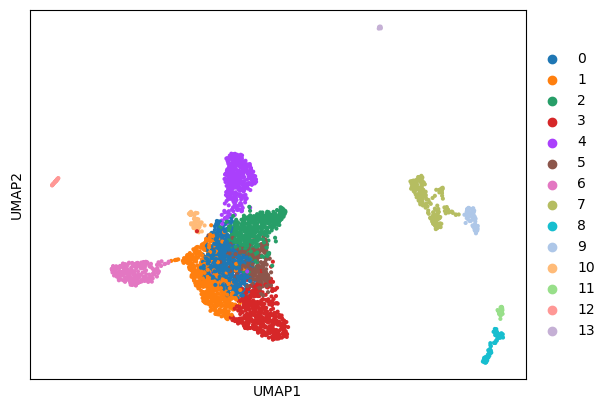

In [46]:
sc.pp.neighbors(introexon_no5, n_neighbors=25, n_pcs=15)
sc.tl.leiden(introexon_no5, resolution=0.8)
sc.tl.umap(introexon_no5,min_dist=0.4)
sc.pl.umap(introexon_no5, color=['leiden'] ,title='')


### remove doublet

In [47]:
introexon_no5.obs

,sample_ID_Plate,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,prediction,leiden
AACCACATCGAAGACCGTAA,11074333,4314,4314,13718.0,9.0,0.065607,0,0,doublet,1
AACCACATCGAAGCTGACCG,11074333,3013,3012,5818.0,13.0,0.223444,0,0,singlet,4
AACCACATCGACCATATGAG,11177067,3578,3578,8366.0,15.0,0.179297,0,0,doublet,6
AACCACATCGACCTACCTGG,11074333,999,999,1252.0,2.0,0.159744,0,0,singlet,0
AACCACATCGAGATCATCTG,11074333,1060,1060,1470.0,3.0,0.204082,0,0,singlet,3
...,...,...,...,...,...,...,...,...,...,...
TTGATCTTGGTGCCTGAGAT,11074339,5071,5070,14163.0,13.0,0.091788,0,0,singlet,12
TTGATCTTGGTGGTTCGCAA,11074339,2372,2372,4185.0,3.0,0.071685,0,0,singlet,0
TTGATCTTGGTTGCCTCGAT,11074328,3761,3759,10147.0,12.0,0.118262,0,0,singlet,0
TTGATCTTGGTTGCGCTAAT,11074328,3223,3219,7855.0,6.0,0.076384,0,0,singlet,1


In [49]:
introexonnodoublet

AnnData object with n_obs × n_vars = 2962 × 31392
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'prediction', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'prediction_colors', 'sample_ID_Plate_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'distances', 'connectivities'

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


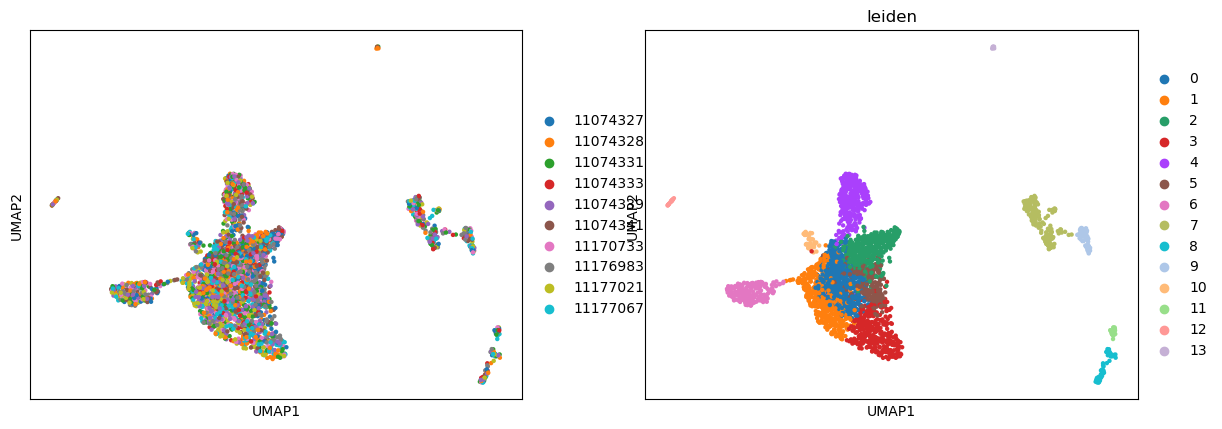

In [48]:
introexonnodoublet=introexon_no5[introexon_no5.obs.prediction!='doublet'].copy()
sc.pl.umap(introexonnodoublet, color=['sample_ID_Plate','leiden'] ,title='')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


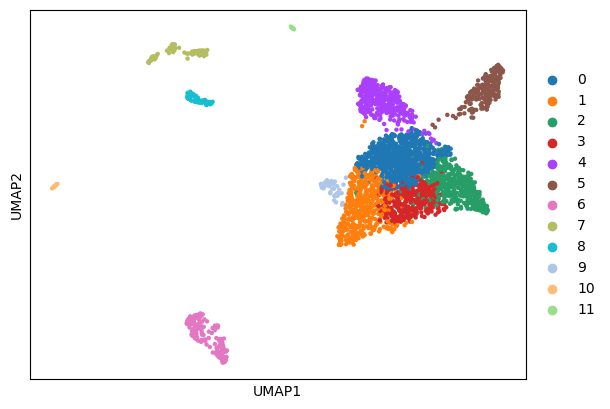

In [50]:
sc.pp.neighbors(introexonnodoublet, n_neighbors=25, n_pcs=15)
sc.tl.leiden(introexonnodoublet, resolution=0.8)
sc.tl.umap(introexonnodoublet,min_dist=0.4)
sc.pl.umap(introexonnodoublet, color=['leiden','Gabra6'] ,title='')


/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


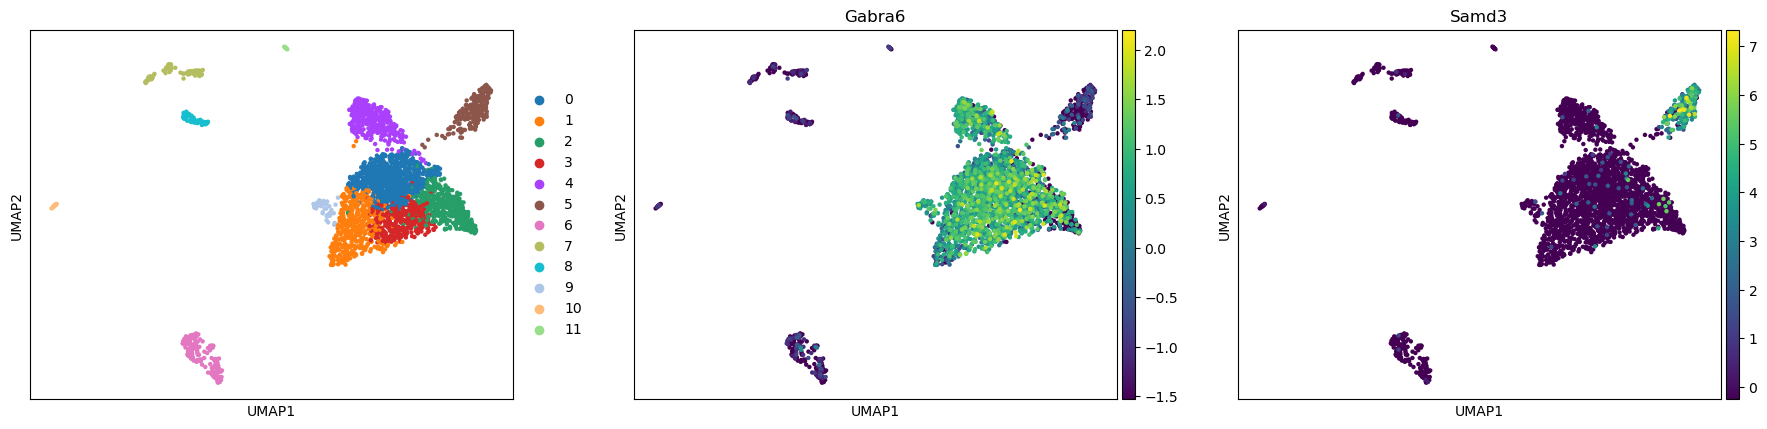

In [52]:
sc.pl.umap(introexonnodoublet, color=['leiden','Gabra6','Samd3'] ,title='')


In [42]:
introexonnodoublet.write_h5ad('/proj/sensoryaging/data/data/up_dated_data/CNs/analysis/introexonnodoublet.h5ad')

In [3]:
import scanpy as sc
import numpy as np
import pandas as pd
introexonnodoublet=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/CNs/analysis/introexonnodoublet.h5ad')

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


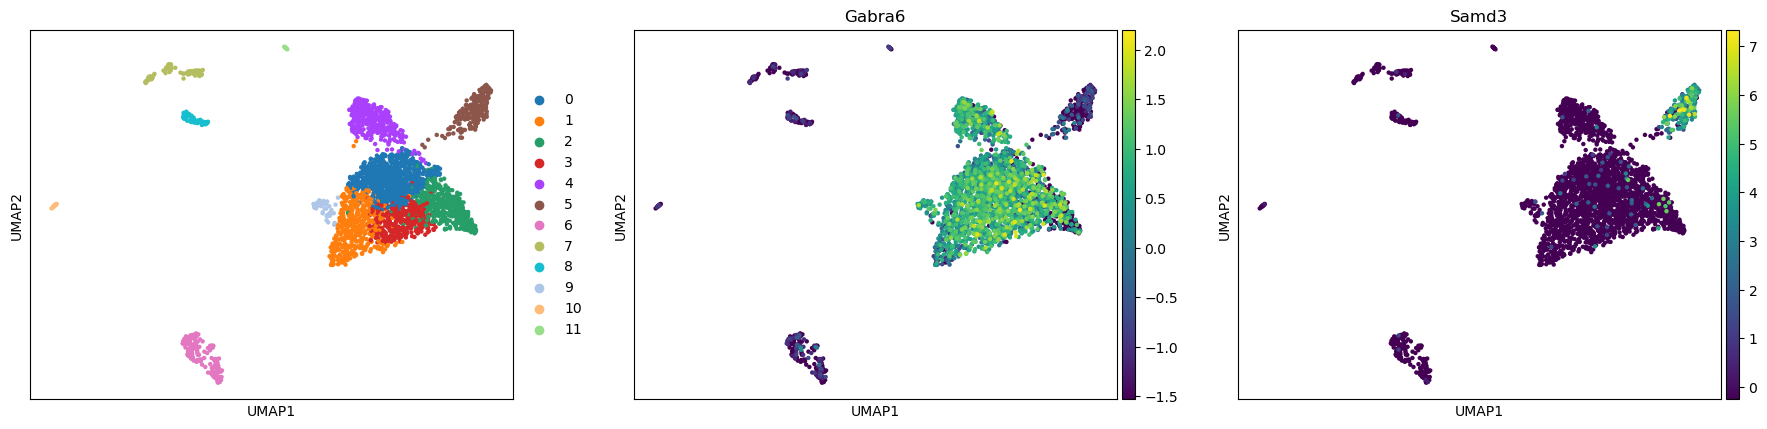

In [4]:
introexonnodoublet
sc.pl.umap(introexonnodoublet, color=['leiden','Gabra6','Samd3'] ,title='')


In [5]:
introexonnodoublet

AnnData object with n_obs × n_vars = 2962 × 31392
    obs: 'sample_ID_Plate', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'prediction', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'prediction_colors', 'sample_ID_Plate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances'

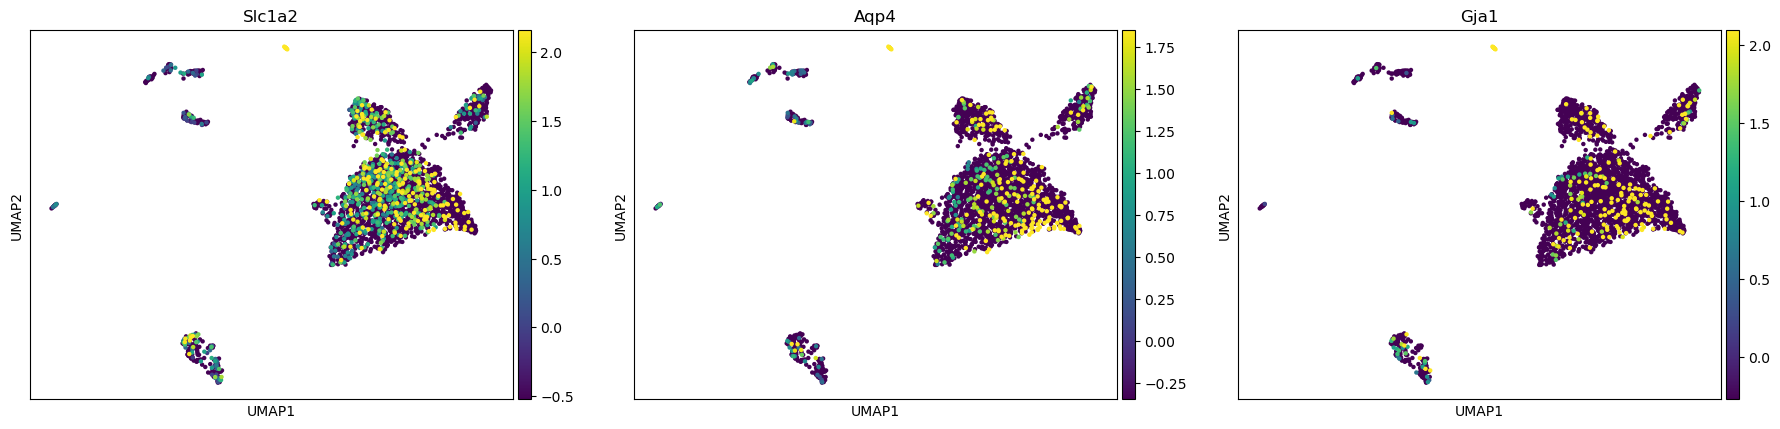

In [19]:
astrocyte=['Slc1a2','Aqp4','Gja1']
sc.pl.umap(introexonnodoublet,color=astrocyte,vmax='p95')

In [34]:
def umap(a):
    sc.pl.umap(introexonnodoublet,color=a,vmax='p95')

UMAP for Astrocyte:


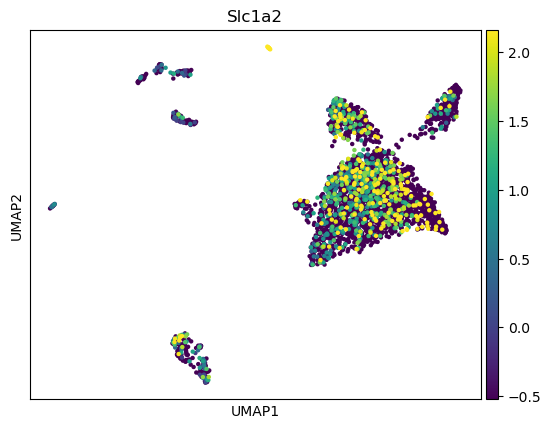

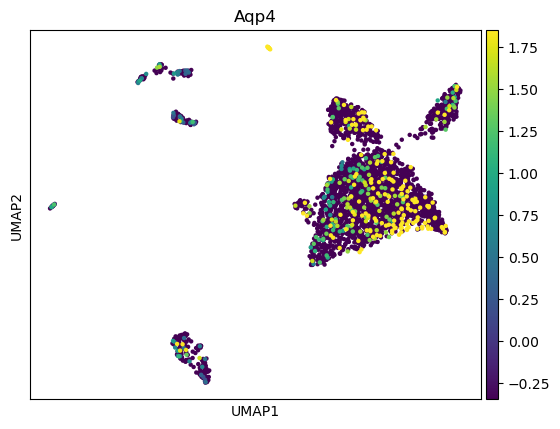

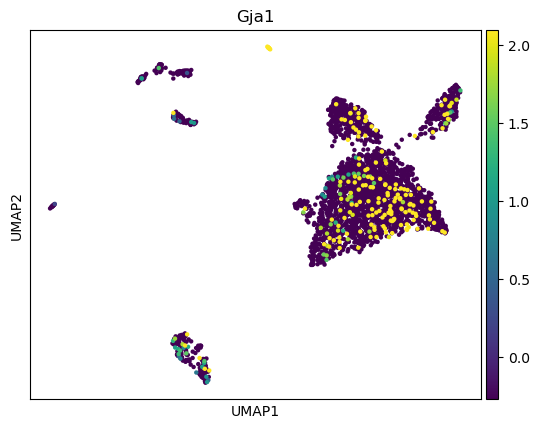

UMAP for Fibroblast:


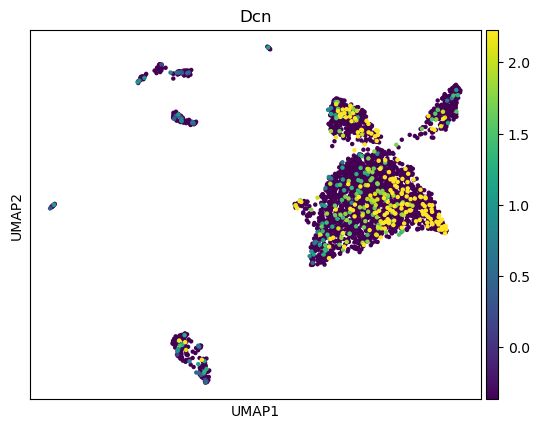

UMAP for Inhibitory Neurons:


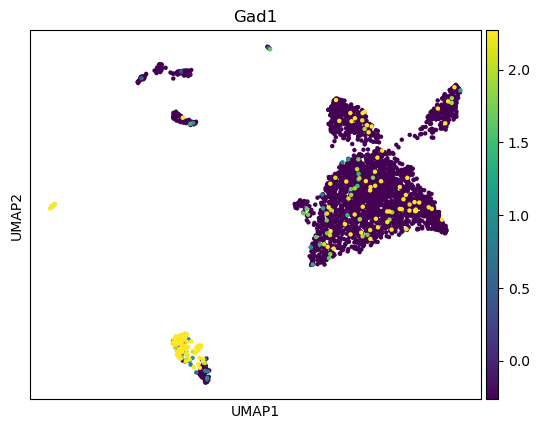

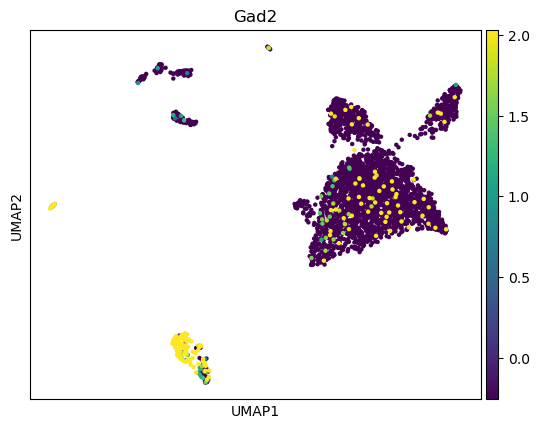

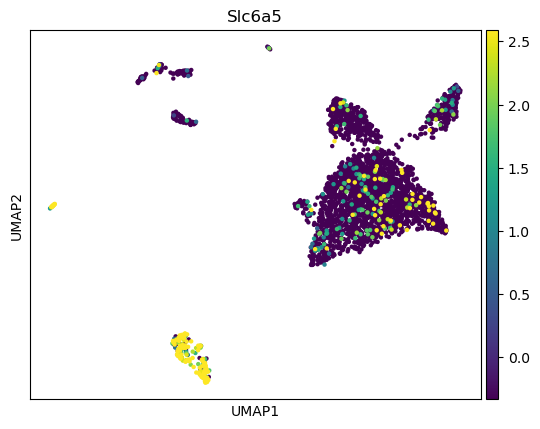

UMAP for Expn:


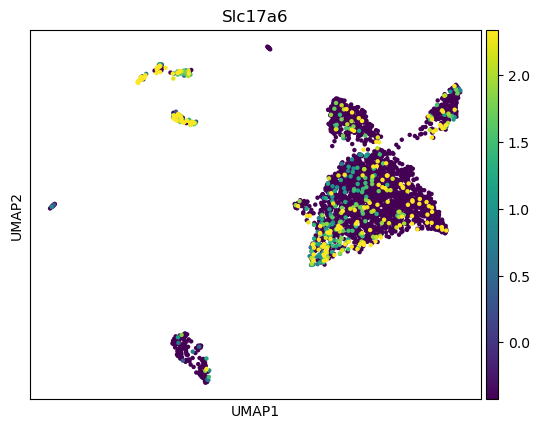

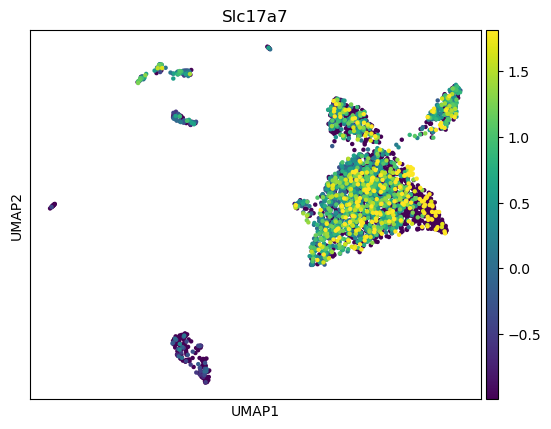

UMAP for Endothelial:


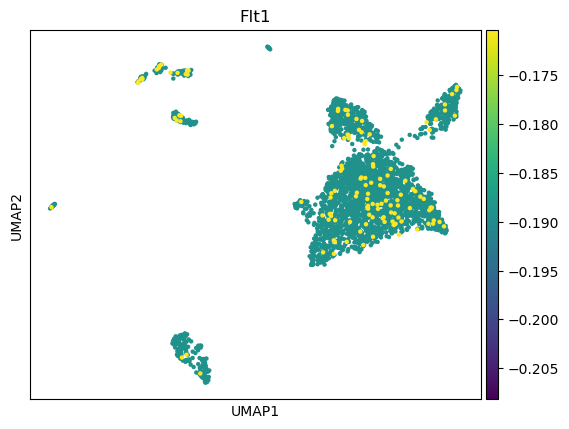

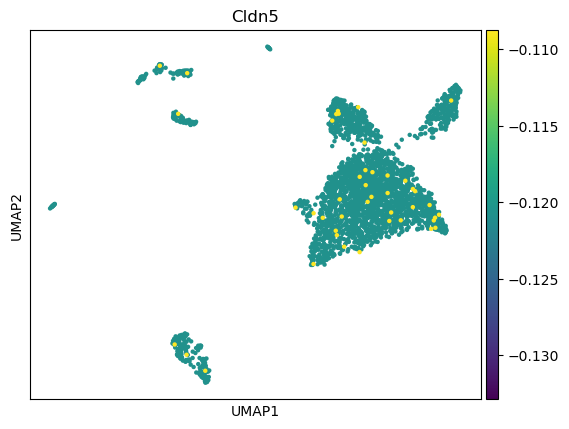

UMAP for Oligodendrocyte:


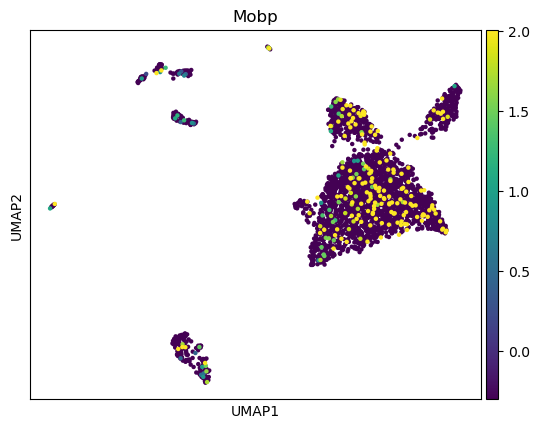

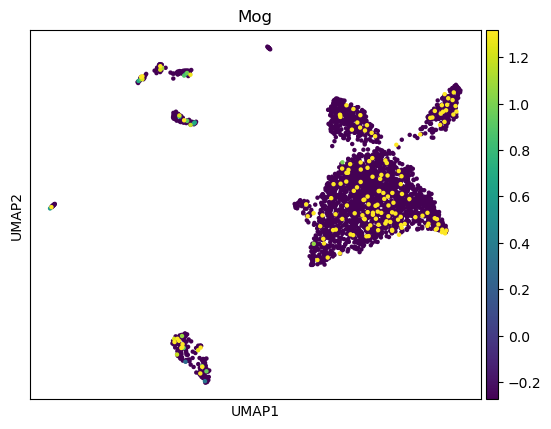

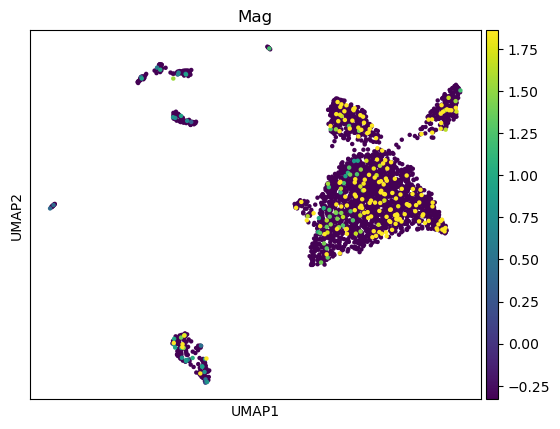

UMAP for Oligodendrocyte Precursor Cell:


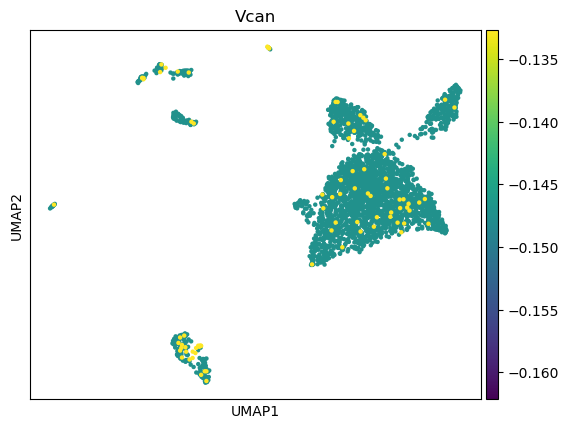

UMAP for Pericyte:


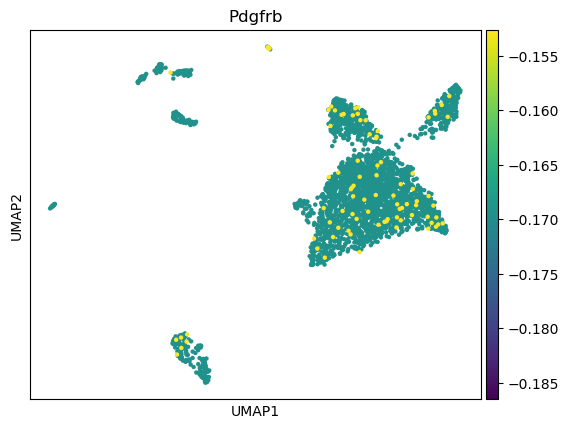

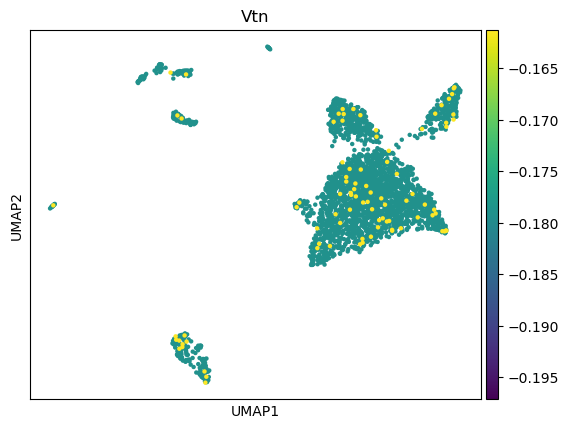

UMAP for Macrophage:


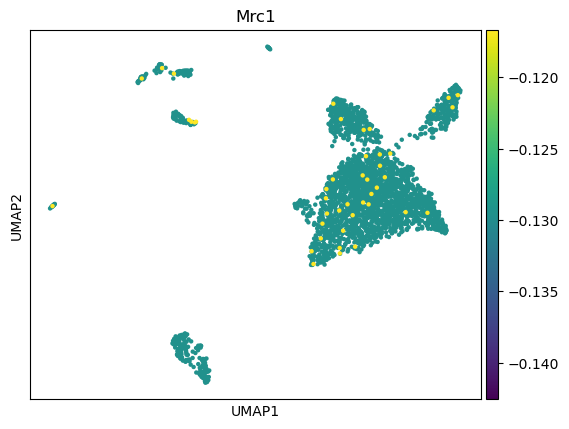

Gene Ptorc not found.


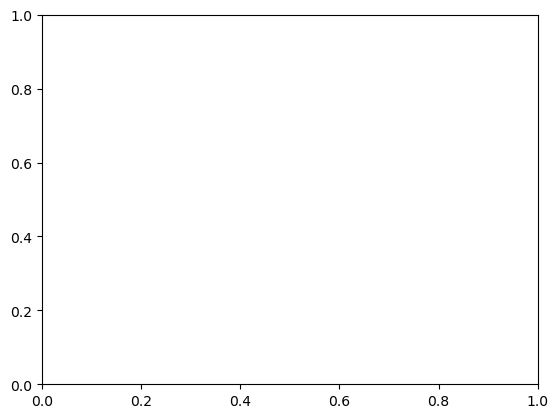

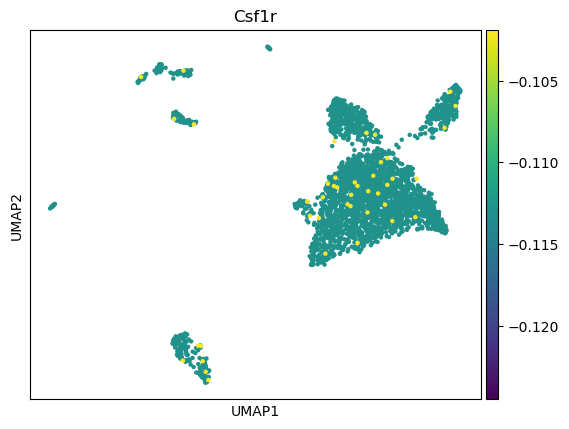

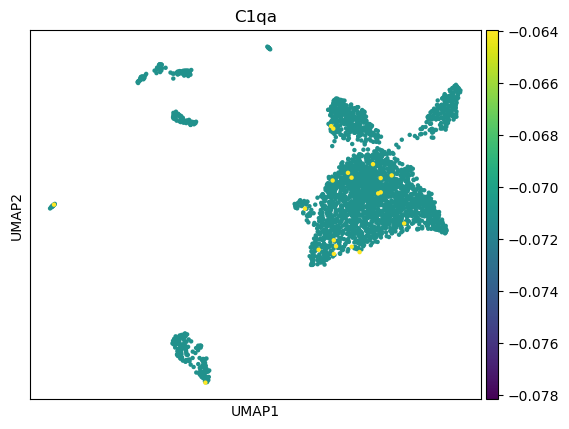

UMAP for UBC:


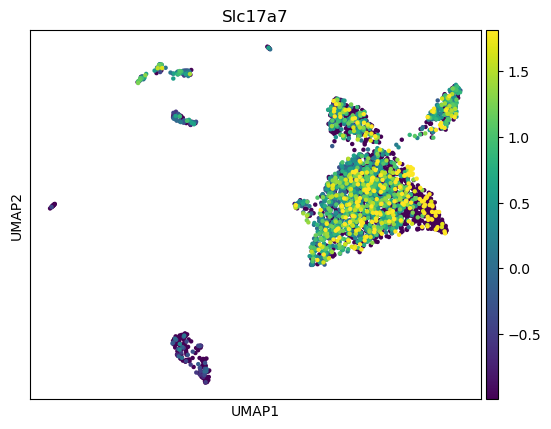

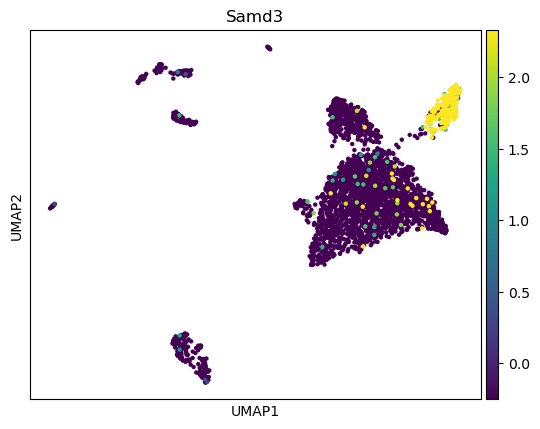

UMAP for Granule:


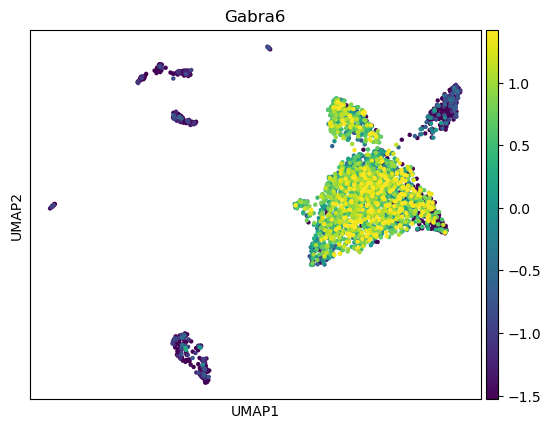

UMAP for Microglia:
Gene Ptorc not found.


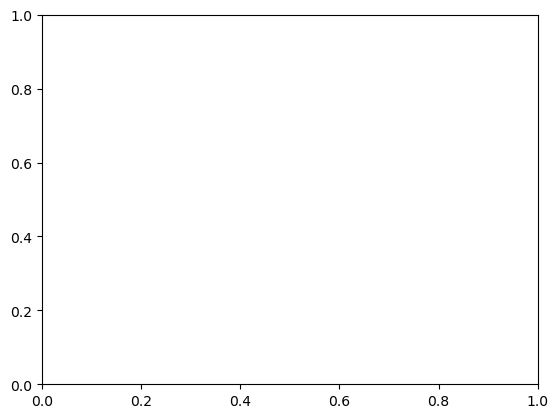

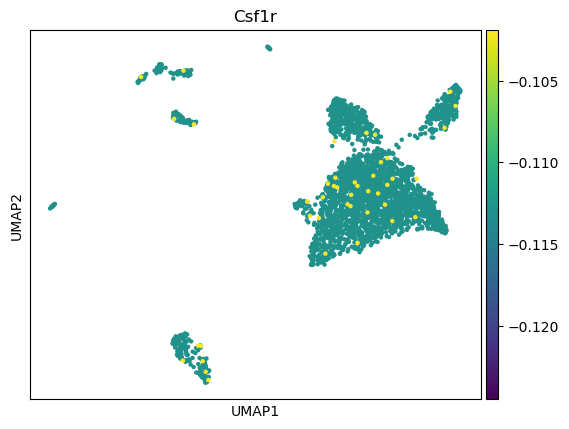

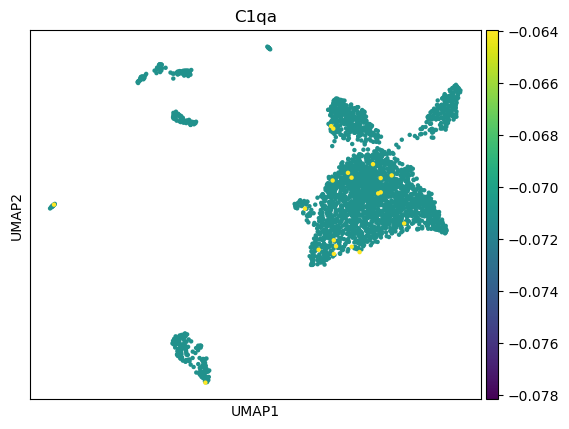

UMAP for VSMC:


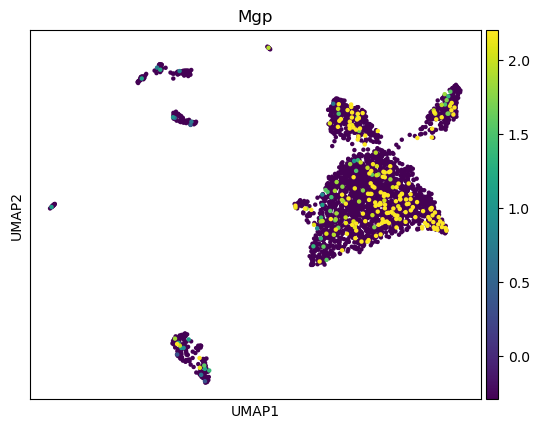

UMAP for Ependymal:


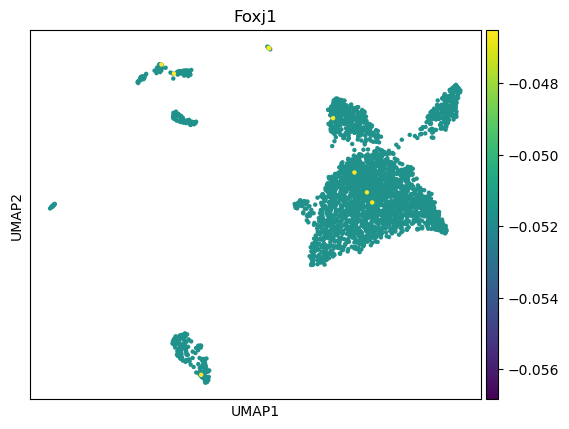

Genes not found: ['Ptorc', 'Ptorc']


In [41]:
not_found_genes = []


for cell_type, markers in cell_markers.items():
    print(f"UMAP for {cell_type}:")
    for marker in markers:

        try:
            umap(marker)

        except KeyError:
            print(f"Gene {marker} not found.")
            not_found_genes.append(marker)

# Print the genes that are not found
print(f"Genes not found: {not_found_genes}")

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


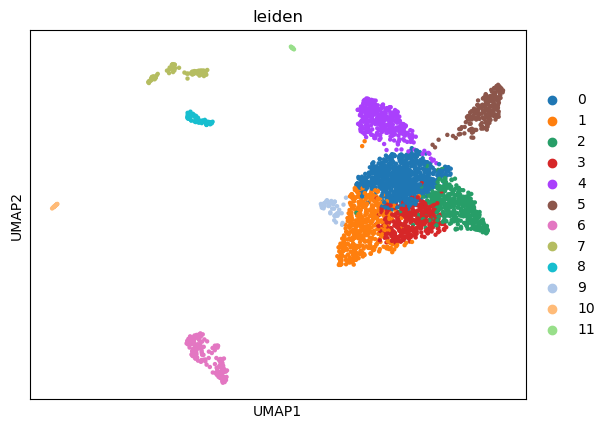

In [4]:
import scanpy as sc
sc.pl.umap(introexonnodoublet,color='leiden')

### subset 1 

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


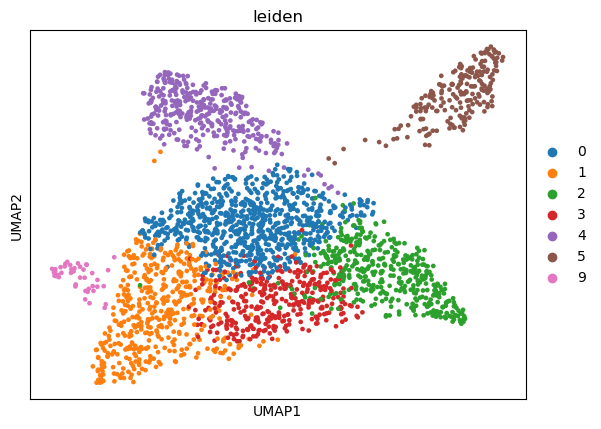

In [7]:
subset1 = introexonnodoublet[introexonnodoublet.obs.leiden.isin(['0','5','4','1','3','2','9'])].copy()
sc.pl.umap(subset1, color='leiden')


In [8]:
subset1.write_h5ad("subset1.h5ad")

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:

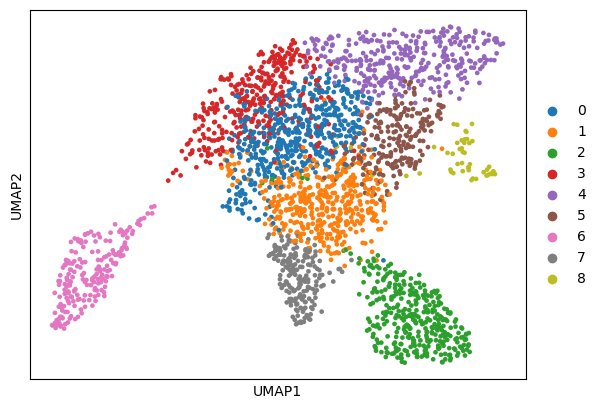

In [15]:
sc.pp.neighbors(subset1, n_neighbors=10, n_pcs=15)
sc.tl.leiden(subset1, resolution=0.8)
sc.tl.umap(subset1,min_dist=0.4)
sc.pl.umap(subset1, color=['leiden'] ,title='')

### subset 2

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


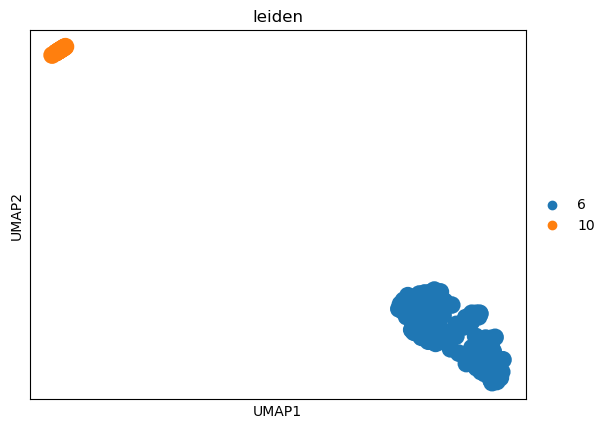

In [12]:
subset2= introexonnodoublet[introexonnodoublet.obs.leiden.isin(['6','10'])]
sc.pl.umap(subset2, color=['leiden'])
subset2.write_h5ad("subset1.h5ad")

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


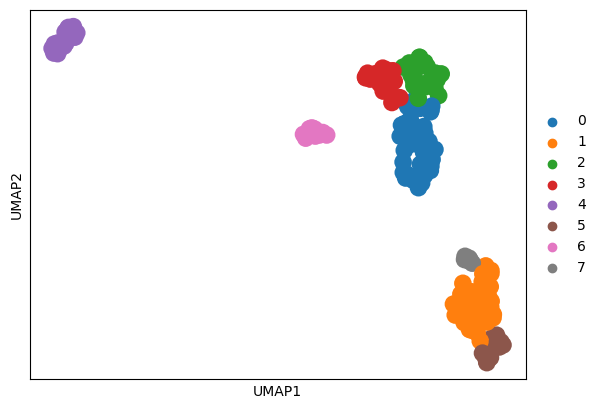

In [16]:
sc.pp.neighbors(subset2, n_neighbors=10, n_pcs=15)
sc.tl.leiden(subset2, resolution=0.8)
sc.tl.umap(subset2,min_dist=0.2)
sc.pl.umap(subset2, color=['leiden'] ,title='')

### subset 3

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


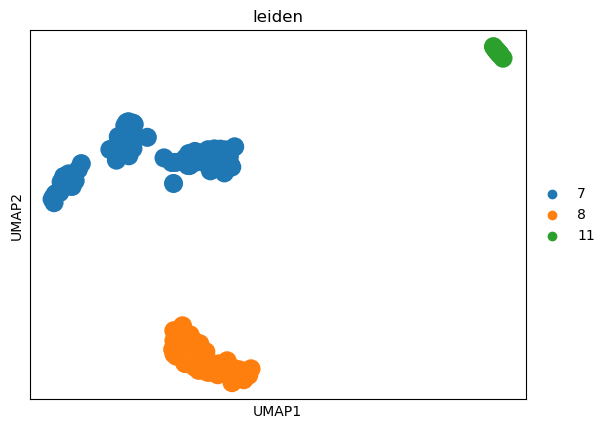

In [14]:
subset3= introexonnodoublet[introexonnodoublet.obs.leiden.isin(['8','7','11'])]
sc.pl.umap(subset3, color=['leiden'])
subset2.write_h5ad("subset1.h5ad")

/home/juany/.conda/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


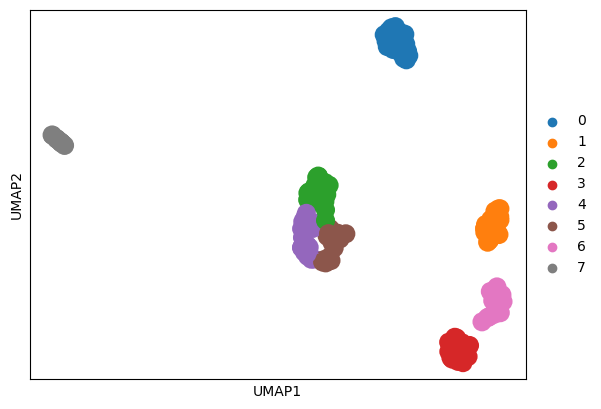

In [17]:
sc.pp.neighbors(subset3, n_neighbors=10, n_pcs=15)
sc.tl.leiden(subset3, resolution=0.8)
sc.tl.umap(subset3,min_dist=0.2)
sc.pl.umap(subset3, color=['leiden'] ,title='')